# 📘 Convolutional Neural Network (CNN) – Theoretical Explanation

## 🔹 Introduction
A **Convolutional Neural Network (CNN)** is a type of deep learning model mainly used for **image recognition, classification, and computer vision tasks**.  
Unlike traditional neural networks, CNNs can **automatically learn spatial hierarchies of features** from images (edges → shapes → objects).  

---

## 🔹 Why CNN?
- Traditional **Fully Connected Neural Networks (MLPs)** struggle with image data because:
  - Too many parameters (images have thousands of pixels).
  - They don’t preserve spatial information (which pixel is near which one).
- CNN solves these by:
  - **Reducing parameters** using convolution and pooling.
  - **Preserving local patterns** (edges, corners, textures).

---

## 🔹 CNN Architecture Components

### 1. **Input Layer**
- Accepts raw image data (e.g., 28x28 grayscale or 224x224 RGB).
- Images are usually represented as **tensors**:  
  - Grayscale → (Height × Width × 1)  
  - RGB → (Height × Width × 3)

---

### 2. **Convolutional Layer**
- The **heart of CNN**.
- Uses **filters (kernels)** that slide over the image to detect features.
- Each filter detects different patterns (e.g., edges, corners, textures).
- Output = **Feature Map** (or Activation Map).

**Mathematical Idea:**  
Convolution = element-wise multiplication + summation of overlapping region.

---

### 3. **Activation Function (ReLU)**
- After convolution, we apply **ReLU (Rectified Linear Unit)**.
- Why? To introduce **non-linearity** (since images are not just linear data).
- Formula: Relu(x) = max(0, x)
---

---

### 4. **Pooling Layer (Downsampling)**
- Reduces the size of feature maps → **fewer computations, avoids overfitting**.
- Common types:
- **Max Pooling** → takes maximum value from patch.
- **Average Pooling** → takes average value from patch.

---

### 5. **Fully Connected Layer (Dense Layer)**
- Flattens the pooled feature maps into a vector.
- Passes through traditional neural network layers.
- Learns **high-level combinations of features**.

---

### 6. **Output Layer**
- Usually a **Softmax layer** (for classification).
- Outputs probability distribution across classes (e.g., dog: 0.8, cat: 0.1, car: 0.1).

---

## 🔹 CNN Pipeline (Step by Step)
1. **Input Image** (e.g., cat picture).
2. **Convolution** → detect low-level features (edges, corners).
3. **ReLU** → keep only positive values.
4. **Pooling** → reduce size, keep important features.
5. Repeat **Conv + ReLU + Pooling** multiple times (deeper network).
6. **Flatten** → convert to 1D vector.
7. **Fully Connected Layers** → learn complex features.
8. **Output Layer** → predict the class.

---

## 🔹 Key Advantages of CNN
- **Automatic Feature Extraction** (no manual feature engineering).
- **Parameter Sharing** (same filter is reused → fewer weights).
- **Translation Invariance** (can detect object regardless of position).

---

## 🔹 Real-Life Example
👀 Suppose you want to detect whether an image is of a **cat or dog**:  
- **Convolution Layer 1**: detects edges, fur patterns.  
- **Convolution Layer 2**: detects ears, eyes, nose shape.  
- **Convolution Layer 3**: detects overall face/head.  
- **Fully Connected Layer**: decides → "This looks 90% like a Cat, 10% Dog".  

---

## 🔹 Applications of CNN
- Image classification (Cats vs Dogs, MNIST digits).
- Object detection (YOLO, Faster R-CNN).
- Face recognition.
- Medical image analysis (X-ray, MRI).
- Self-driving cars (road signs, pedestrians).
- Natural Language Processing (using 1D CNNs for text).

---

## 🔹 Limitations of CNN
- Requires **large labeled datasets**.
- **High computational cost** (needs GPU/TPU).
- Not rotation/scale invariant (unless trained with augmentation).

---

## 🔹 Summary
A **Convolutional Neural Network (CNN)** is a powerful deep learning model that:
- Uses convolution to extract features.
- Uses pooling to reduce dimensionality.
- Uses fully connected layers for classification.  
It mimics the way the human brain processes visual data and has revolutionized computer vision tasks.

---
✅ **In short:** CNN learns to see like humans – starting from edges → shapes → objects → decisions.




In [118]:
# Imporitng Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [119]:
# Let's Load the Dataset
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [120]:
# Let's check the shape of dataset
print(f"We have {len(X_train)} images in the Training Dataset and {len(X_test)} in the Testing Dataset.")

We have 60000 images in the Training Dataset and 10000 in the Testing Dataset.


In [121]:
print(f"Shape of X_train:", X_train.shape)
print(f"Shape of X_test:", X_test.shape)
print(f"Shape of y_train:", y_train.shape)
print(f"Shape of y_test:", y_test.shape)



Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


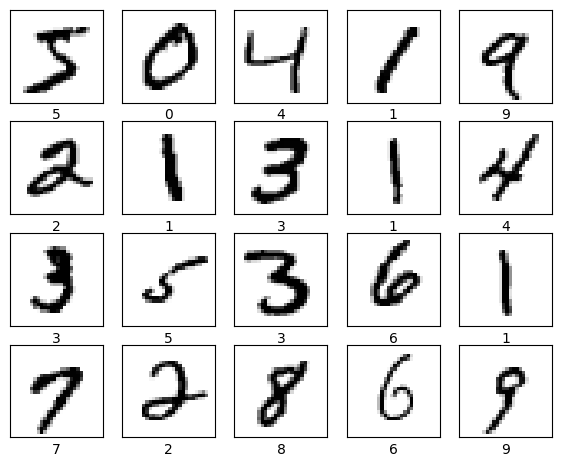

In [122]:
# Display some sample images
plt.figure(figsize=(7,7))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

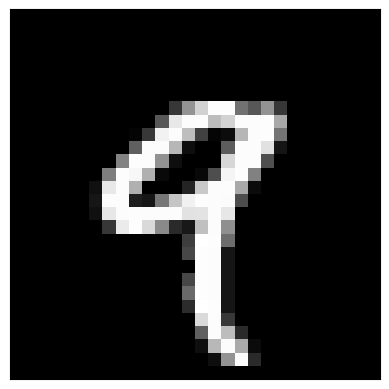

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 16

In [123]:
# Display the fifth image in the dataset as a data matrix
plt.imshow(X_train[4], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[4]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [124]:
# Let's Normalize the data.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

In [125]:
# Let's Build the Model.
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 10)         0         
 g2D)                                                 

In [126]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [127]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the callback function
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2616 - accuracy: 0.9165 - val_loss: 0.0842 - val_accuracy: 0.9732
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0892 - accuracy: 0.9721 - val_loss: 0.0747 - val_accuracy: 0.9763
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.0488 - val_accuracy: 0.9860
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0521 - val_accuracy: 0.9833
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.0401 - val_accuracy: 0.9873
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 7/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0329 - val_ac

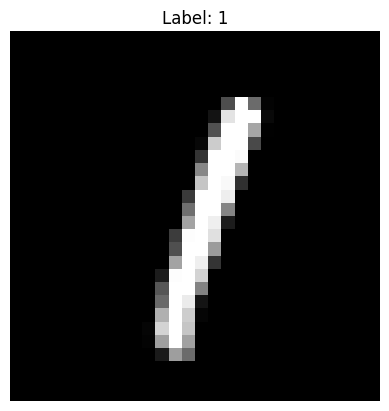

In [128]:
import matplotlib.pyplot as plt

# show the sixth test image
plt.imshow(X_test[5].reshape(28,28), cmap='gray')  # 28x28 pixel gray image
plt.title(f"Label: {y_test[5]}")
plt.axis('off')
plt.show()


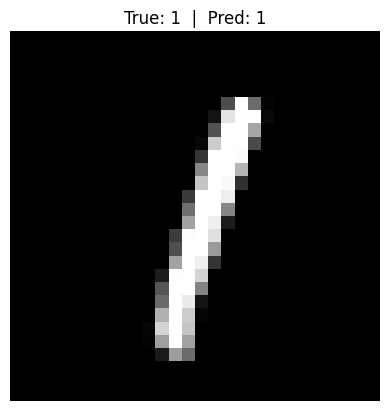

In [129]:
img = X_test[5].reshape(1,28,28,1)   # reshape for model input
pred = model.predict(img, verbose=0).argmax()  # predicted label
    
plt.imshow(X_test[5].reshape(28,28), cmap='gray')
plt.title(f"True: {y_test[5]}  |  Pred: {pred}")
plt.axis('off')
plt.show()

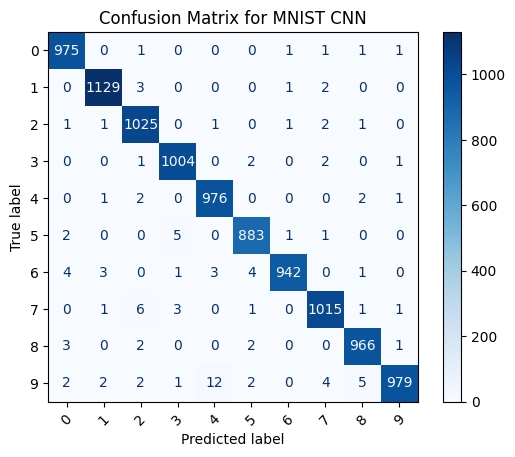

In [130]:
# Ensure test data has correct shape (samples, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Predict all test images
y_pred = model.predict(X_test_reshaped, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)  # convert probabilities to class index

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for MNIST CNN")
plt.show()
